<a href="https://colab.research.google.com/github/faizuddin/ISB46703/blob/main/probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is probability?

Probability seeks to answer the question, “What is the chance of an event happening?” An event is some outcome of interest. To calculate the chance of an event happening, we also need to consider all the other events that can occur. The most perfect representation of probability is the simple coin toss. In a coin toss the only events that can happen are:

1. Flipping a heads
2. Flipping a tails

These two events form the **sample space**, the set of all possible events that can happen. To calculate the probability of an event occurring, we count how many times are event of interest can occur (say flipping heads) and dividing it by the sample space. Thus, probability will tell us that an ideal coin will have a 1-in-2 (or 50/50) chance of being heads or tails. By looking at the events that can occur, probability gives us a framework for making predictions about how often events will happen. However, even though it seems obvious, if we actually try to toss some coins, we’re likely to get an abnormally high or low counts of heads every once in a while. If we don’t want to make the assumption that the coin is fair, what can we do? We can gather data! We can use statistics to calculate probabilities based on observations from the real world and check how it compares to the ideal.

# From statistics to probability

Our data will be generated by flipping a coin 10 times and counting how many times we get heads. We will call a set of *10 coin tosses a trial*. Our data point will be the number of heads we observe. We may not get the “ideal” 5 heads, but we won’t worry too much since one trial is only one data point. If we perform many, many trials, we expect the average number of heads over all of our trials to approach the 50%. 

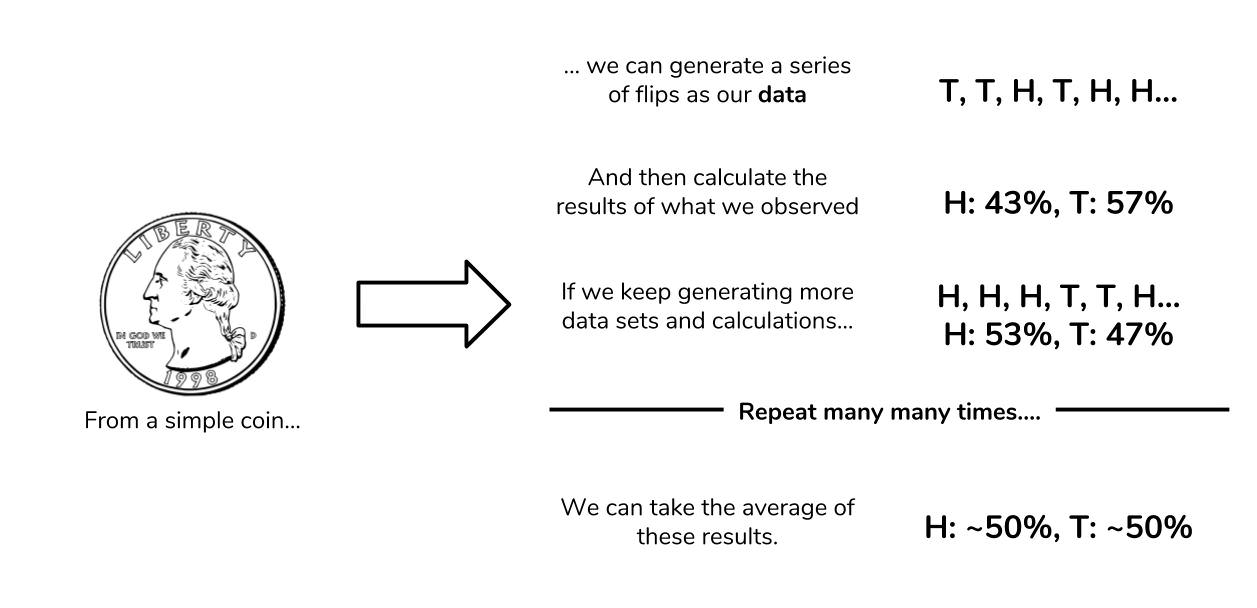

## Example
The code below simulates 10, 100, 1000, and 1000000 trials, and then calculates the average proportion of heads observed. 

In [10]:
import random

def coin_trial():
  heads = 0
  for i in range(100):
    if random.random() <= 0.5:
      heads +=1
  return heads

def simulate(n):
  trials = []
  for i in range(n):
    trials.append(coin_trial())
  return(sum(trials)/n)

In [11]:
simulate(10)

47.3

In [12]:
simulate(100)

49.54

In [13]:
simulate(1000000)

49.993682

## Probabilities using `prob140` and `datascience` library

In order to implement probabilities programatically, we will use two useful Python packages:

1. `prob140` - contributed by UC Berkeley's probability course.
2. `datascience`- contributed by UC Berkeley's data science course.


In [ ]:
# installation 
!pip install prob140

In [ ]:
# installation
!pip install datascience

In [16]:
from datascience import *
from prob140 import *

#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # {num}erical {py}thon
plt.style.use('fivethirtyeight')

# Creating Distribution

The `prob140` library adds distribution methods to the default [table class](http://data8.org/datascience/tables.html). A distribution is defined as a 2-column table in which the first column represents the domain of the distribution while the second column represents the probabilities associated with each value in the domain.

You can specify a list or array to the methods domain and probability to specify those columns for a distribution

In [17]:
dist1 = Table().domain(make_array(2, 3, 4)).probabilities(make_array(0.25, 0.5, 0.25))

In [18]:
dist1

Value,Probability
2,0.25
3,0.5
4,0.25


We can also construct a distribution by explicitly assigning values for the domain but applying a probability function to the values of the domain.

In [22]:
def p(x):
  return 0.25

dist2 = Table().domain(np.arange(1, 8, 2)).probability_function(p)

In [23]:
dist2

Value,Probability
1,0.25
3,0.25
5,0.25
7,0.25


This can be very useful when we have a distribution with a known probability density function. In this case we use Binomial distribution where only two outcomes are possible, such as success or failure, gain or loss, win or lose and where the probability of success and failure is same for all the trials.

In [38]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html?highlight=comb#scipy.special.comb
from scipy.special import comb

def pmf(x):
  n = 10
  p = 0.3
  return comb(n,x) * p**x * (1-p)**(n-x)

binomial = Table().domain(np.arange(100)).probability_function(pmf)

In [39]:
binomial

Value,Probability
0,0.0282475
1,0.121061
2,0.233474
3,0.266828
4,0.200121
5,0.102919
6,0.0367569
7,0.00900169
8,0.0014467
9,0.000137781


## Events
Often, we are concerned with specific values in a distribution rather than all the values. Calling `event` allows us to see a subset of the values in a distribution and the associated probabilities.

In [29]:
dist1

Value,Probability
2,0.25
3,0.5
4,0.25


In [30]:
dist1.event(np.arange(1,4))

P(Event) = 0.75


Outcome,Probability
1,0
2,0.25
3,0.5


In [31]:
dist2

Value,Probability
1,0.25
3,0.25
5,0.25
7,0.25


In [32]:
dist2.event([1, 3, 3.5, 6])

P(Event) = 0.5


Outcome,Probability
1,0.25
3,0.25
3.5,0
6,0


To find the probability of an `event`, we can call `prob_event`, which sums up the probabilities of each of the values

In [33]:
dist1.prob_event(np.arange(1,4))

0.75

In [34]:
dist2.prob_event([1, 3, 3.5, 6])

0.5

In [36]:
#binomial.event([5])
binomial.prob_event(np.arange(5))

P(Event) = 0.10291934519999994


0.8497316673999995

In [37]:
binomial.prob_event(np.arange(11))

0.9999999999999992

## Visualisation
To visualise our distributions, we can plot a histogram of the density using the `Plot` function.

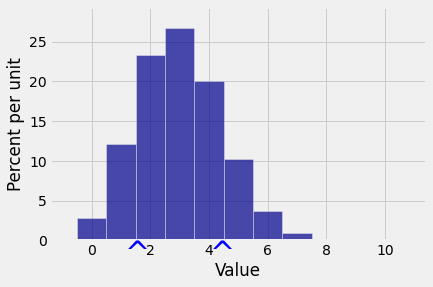

In [41]:
Plot(binomial)

In [42]:
dist2

Value,Probability
1,0.25
3,0.25
5,0.25
7,0.25


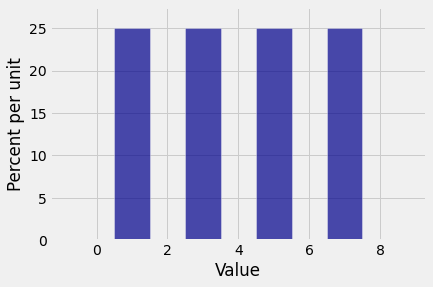

In [43]:
Plot(dist2)

### Width
If want to specify the width of every bar, we can use the optional parameter `width=` to specify the bin sizes. However, this should be used very rarely, only when there is uniform spacing between bars.

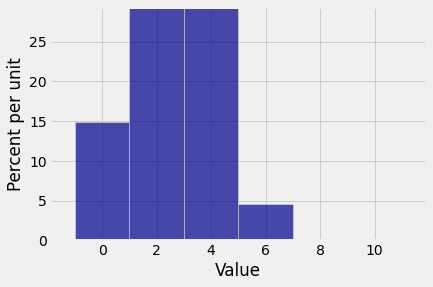

In [47]:
Plot(binomial, width=2)

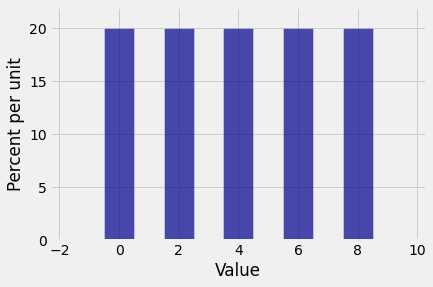

In [50]:
dist3 = Table().domain(np.arange(0, 10, 2)).probability_function(lambda x: 0.2)
Plot(dist3)

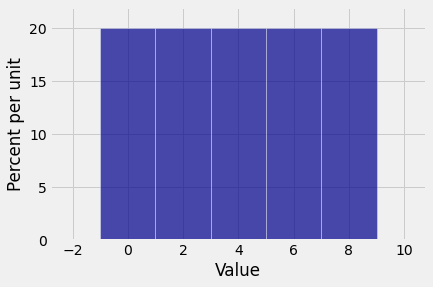

In [51]:
Plot(dist3, width=2)

### Highlighting events
Sometimes, we want to highlight an event or events in our histogram. Do make an event a different color, we can use the optional parameter `event=`. An event must be a list or a list of lists.

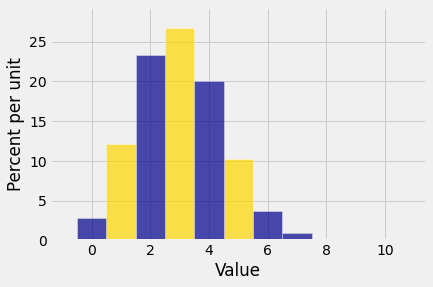

In [52]:
Plot(binomial, event=[1,3,5])

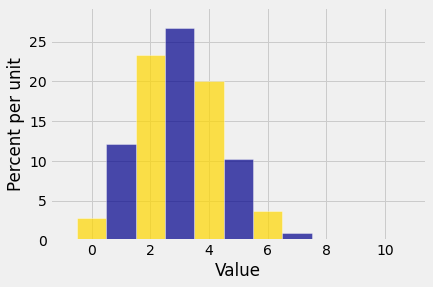

In [53]:
Plot(binomial, event=np.arange(0,10,2))

If we use a list of lists for the event parameter, each event will be a different color.

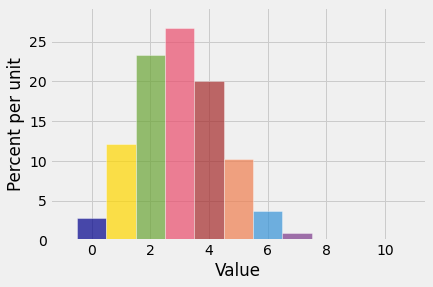

In [54]:
Plot(binomial, event=[[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])

### Plotting multiple distributions
It is often useful to plot multiple histograms on top of each other. To plot multiple distributions on the same graph, use the `Plots` function. `Plots` takes in an even number of arguments, alternating between the label of the distribution and the distribution table itself.

In [57]:
dist1

Value,Probability
2,0.25
3,0.5
4,0.25


In [58]:
dist2

Value,Probability
1,0.25
3,0.25
5,0.25
7,0.25


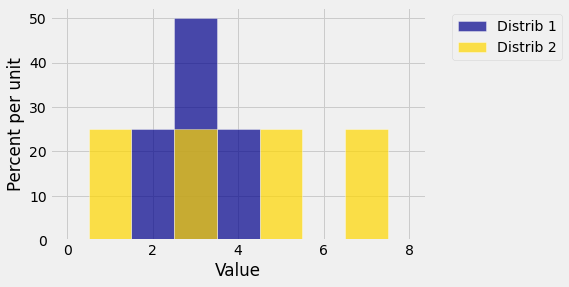

In [56]:
Plots("Distrib 1", dist1, "Distrib 2", dist2)

In [59]:
binomial2 = Table().domain(np.arange(11)).probability_function(lambda x: comb(10,x) * 0.5**10)

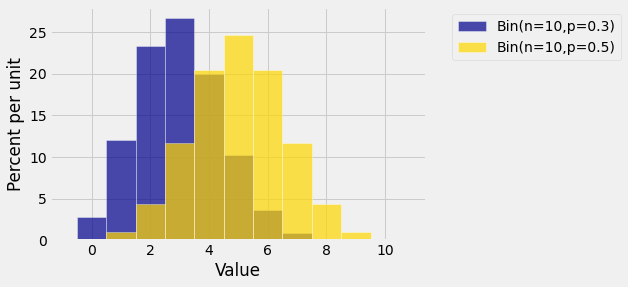

In [60]:
Plots("Bin(n=10,p=0.3)", binomial, "Bin(n=10,p=0.5)", binomial2)

Try to avoid plotting too many distributions together because the graph starts to become unreadable

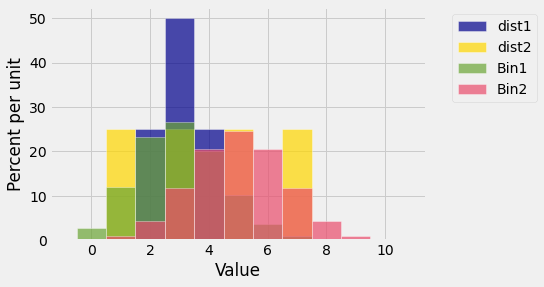

In [61]:
Plots("dist1", dist1, "dist2", dist2, "Bin1", binomial, "Bin2", binomial2)

## Empirical Distributions
Whenever we simulate an event, we often end up with an array of results. We can construct an empirical distribution of the results by grouping of the possible values and assigning the frequencies are probabilities. An easy way to do this is by calling `emp_dist`.

In [62]:
x = make_array(1,1,1,1,1,2,3,3,3,4)
emp_dist(x)

Value,Proportion
1,0.5
2,0.1
3,0.3
4,0.1


In [63]:
values = make_array()

for i in range(10000):
  num = np.random.randint(10) + np.random.randint(10) + np.random.randint(10) + np.random.randint(10)
  values = np.append(values, num)

In [64]:
emp_dist(values)

Value,Proportion
1,0.0003
2,0.0008
3,0.0016
4,0.0035
5,0.0052
6,0.0077
7,0.0108
8,0.0169
9,0.0224
10,0.0255


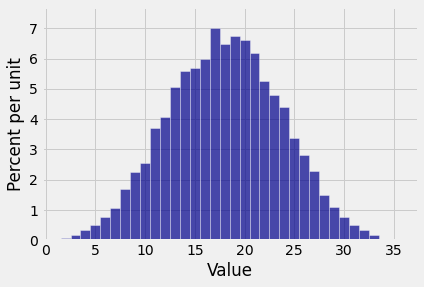

In [65]:
Plot(emp_dist(values))

# Creating Joint Distribution

A joint distribution of multiple random variables gives the probabilities of each individual random variable taking on a specific value. For this lab, we will only be working on joint distributions with two random variables.

## Distribution basics
We can construct a joint distribution by starting with a `Table`. Calling `Table().domain()` with two lists will create a Table with $X$ and $Y$ taking on those values

In [66]:
dist = Table().domain(make_array(2, 3), np.arange(1, 6, 2))
dist

X,Y
2,1
2,3
2,5
3,1
3,3
3,5


We also can then assign values using `probabilities()` with an explicit list of probabilities. This automatically creates the joint distributions of $X$ and $Y$.

In [67]:
dist = dist.probabilities([0.1, 0.1, 0.2, 0.3, 0.1, 0.2])
dist

,X=2,X=3
Y=5,0.2,0.2
Y=3,0.1,0.1
Y=1,0.1,0.3


## Naming the Variables

When defining a distribution, you can also give a name to each random variable rather than the default $X$ and $Y$. You must alternate between strings and lists when calling domain

In [68]:
heads = Table().domain("H1",[0.2,0.9],"H2",[2,1,0]).probabilities(make_array(.75*.04, .75*.32,.75*.64,.25*.81,.25*.18,.25*.01))
heads

,H1=0.2,H1=0.9
H2=2,0.03,0.2025
H2=1,0.24,0.0450
H2=0,0.48,0.0025


You can also use strings for the values of the domain

In [69]:
coins = Table().domain("Coin1",['H','T'],"Coin2", ['H','T']).probabilities(np.array([0.24, 0.36, 0.16, 0.24]))
coins

,Coin1=H,Coin1=T
Coin2=T,0.36,0.24
Coin2=H,0.24,0.16


## Probability Functions
We can also use a joint probability function that will take in the values of the random variables[link text](https://)

In [70]:
def joint_func(dice1, dice2):
  return (dice1 + dice2)/252

dice = Table().domain("D1", np.arange(1,7),"D2", np.arange(1,7)).probability_function(joint_func)

In [71]:
dice

,D1=1,D1=2,D1=3,D1=4,D1=5,D1=6
D2=6,0.027778,0.031746,0.035714,0.039683,0.043651,0.047619
D2=5,0.023810,0.027778,0.031746,0.035714,0.039683,0.043651
D2=4,0.019841,0.023810,0.027778,0.031746,0.035714,0.039683
D2=3,0.015873,0.019841,0.023810,0.027778,0.031746,0.035714
D2=2,0.011905,0.015873,0.019841,0.023810,0.027778,0.031746
D2=1,0.007937,0.011905,0.015873,0.019841,0.023810,0.027778


## Marginal Distributions
To see the marginal distribution of a variable, call the method `marginal("label")` where label is the string of the label

In [72]:
heads.marginal("H1")

,H1=0.2,H1=0.9
H2=2,0.03,0.2025
H2=1,0.24,0.0450
H2=0,0.48,0.0025
Sum: Marginal of H1,0.75,0.2500


In [73]:
heads.marginal("H2")

,H1=0.2,H1=0.9,Sum: Marginal of H2
H2=2,0.03,0.2025,0.2325
H2=1,0.24,0.0450,0.2850
H2=0,0.48,0.0025,0.4825


In [74]:
coins.marginal("Coin1")

,Coin1=H,Coin1=T
Coin2=T,0.36,0.24
Coin2=H,0.24,0.16
Sum: Marginal of Coin1,0.60,0.40


You can also call `both_marginals()` to see both marginal distributions at once

In [75]:
heads.both_marginals()

,H1=0.2,H1=0.9,Sum: Marginal of H2
H2=2,0.03,0.2025,0.2325
H2=1,0.24,0.0450,0.2850
H2=0,0.48,0.0025,0.4825
Sum: Marginal of H1,0.75,0.2500,1.0000


In [76]:
coins.both_marginals()

,Coin1=H,Coin1=T,Sum: Marginal of Coin2
Coin2=T,0.36,0.24,0.6
Coin2=H,0.24,0.16,0.4
Sum: Marginal of Coin1,0.60,0.40,1.0


To get the marginal distribution of a variable as a single variable distribution for plotting, call `marginal_dist("label")`

In [77]:
heads.marginal_dist("H1")

Value,Probability
0.2,0.75
0.9,0.25


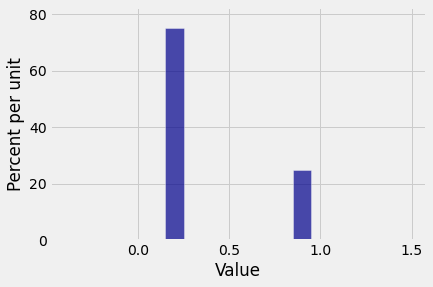

In [78]:
Plot(heads.marginal_dist("H1"), width=0.1)

In [79]:
heads.marginal_dist("H2")

Value,Probability
0,0.4825
1,0.285
2,0.2325


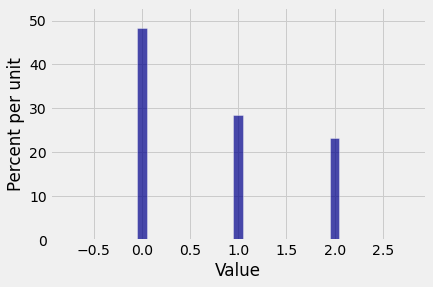

In [80]:
Plot(heads.marginal_dist("H2"), width=0.1)

In [81]:
coins.marginal_dist("Coin1")

Value,Probability
H,0.6
T,0.4


## Conditional Distributions
You can see the conditional distribution using `conditional_dist("label", "given")`. For example, to see the distribution of $H1|H2$, call `conditional_dist(“H1”, “H2”)`

In [84]:
heads.conditional_dist("H1", "H2")

,H1=0.2,H1=0.9,Sum
Dist. of H1 | H2=2,0.129032,0.870968,1.0
Dist. of H1 | H2=1,0.842105,0.157895,1.0
Dist. of H1 | H2=0,0.994819,0.005181,1.0
Marginal of H1,0.750000,0.250000,1.0


In [85]:
heads.conditional_dist("H2", "H1")

,Dist. of H2 | H1=0.2,Dist. of H2 | H1=0.9,Marginal of H2
H2=2,0.04,0.81,0.2325
H2=1,0.32,0.18,0.2850
H2=0,0.64,0.01,0.4825
Sum,1.00,1.00,1.0000
